In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
test = pd.read_csv('/content/DailyDelhiClimateTest.csv')
train = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

print(test.head())
print(train.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


# Data preparation

For null values in time series data we choose Time-based Interpolation: Suitable for time series data where you want to take into account the trend over time.


In [3]:
# Check for missing values and handle them using time-based interpolation

train.isnull().sum()

# Convert the 'date' column to datetime format
train['date'] = pd.to_datetime(train['date'])

# Sort by date to ensure the time-based interpolation works properly
train = train.sort_values('date')

#Set 'date' column as index
train.set_index('date', inplace=True) # This line is added to set the 'date' column as the index

# Interpolate missing values based on time
train.interpolate(method='time', inplace=True)

# Check if any missing values remain
print("Missing values after interpolation:")
print(train.isnull().sum())

# Check data types to ensure they're properly formatted
print("Data types after conversion:")
print(train.dtypes)

# Display the first few rows of the processed data
print("Processed data (first 5 rows):")
print(train.head())

Missing values after interpolation:
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
Data types after conversion:
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object
Processed data (first 5 rows):
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


# Data Exploration

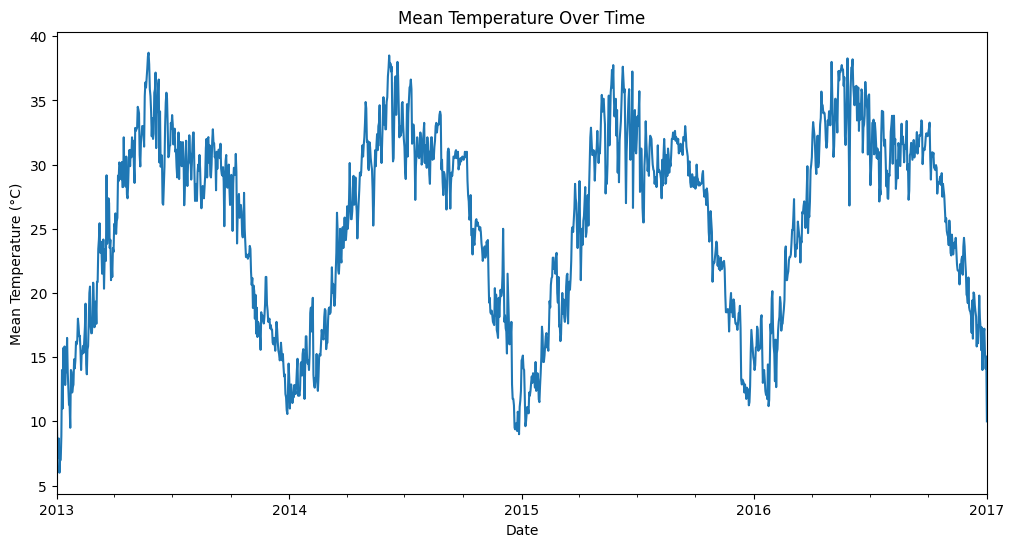

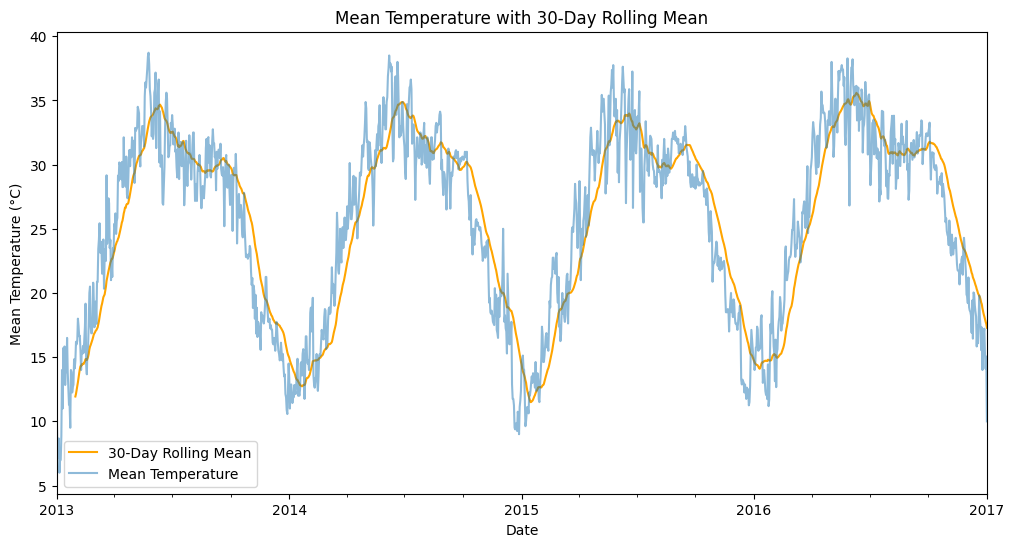

<Figure size 1200x800 with 0 Axes>

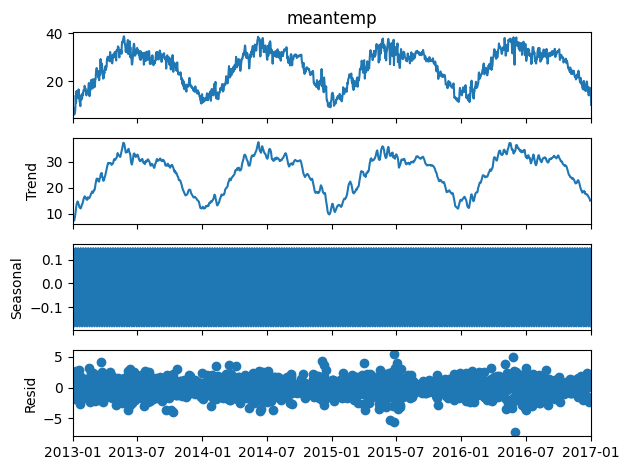

<Figure size 1200x600 with 0 Axes>

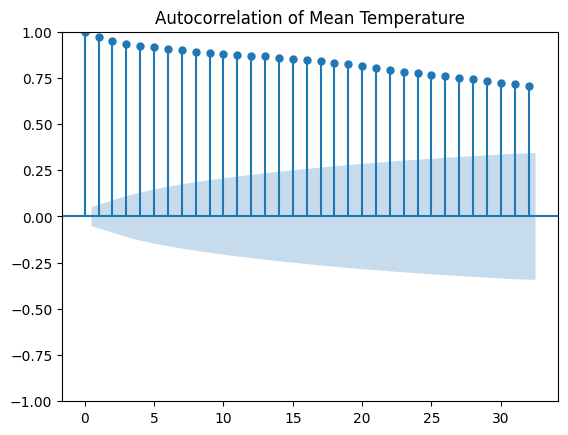

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# 1. Visualize Time Series Data
plt.figure(figsize=(12, 6))
train['meantemp'].plot(title='Mean Temperature Over Time', ylabel='Mean Temperature (°C)', xlabel='Date')
plt.show()

# 2. Identify Trends using rolling()
plt.figure(figsize=(12, 6))
train['meantemp'].rolling(window=30).mean().plot(label='30-Day Rolling Mean', color='orange')
train['meantemp'].plot(label='Mean Temperature', alpha=0.5)
plt.title('Mean Temperature with 30-Day Rolling Mean')
plt.ylabel('Mean Temperature (°C)')
plt.xlabel('Date')
plt.legend()
plt.show()

# 3. Detect Seasonality with seasonal decomposition
result = seasonal_decompose(train['meantemp'], model='additive')
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

# 4. Perform Autocorrelation Analysis
plt.figure(figsize=(12, 6))
plot_acf(train['meantemp'])
plt.title('Autocorrelation of Mean Temperature')
plt.show()

# Time Series Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


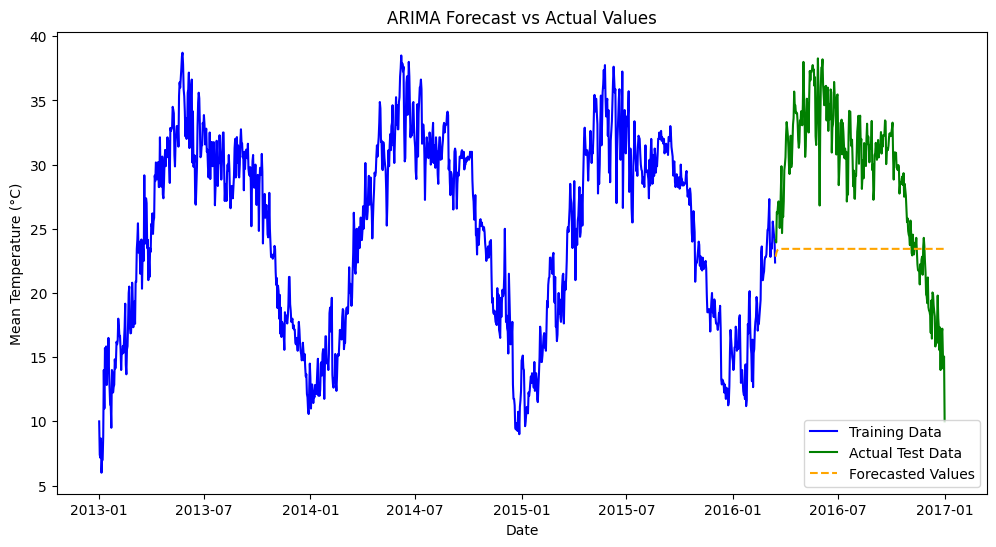

Root Mean Squared Error (RMSE): 8.102417056421306


In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_squared_error as mse

# 1. Split the data into training and testing sets
train_size = int(len(train) * 0.8)  # Use 80% of the data for training
train_data, test_data = train[:train_size], train[train_size:]

# 2. Define and fit an ARIMA model
# You can experiment with different (p, d, q) values; let's start with (p=1, d=1, q=1)
p, d, q = 1, 1, 1
model = ARIMA(train_data['meantemp'], order=(p, d, q))
model_fit = model.fit()

# 3. Forecast future values
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = test_data.index

# 4. Compare forecasted values with actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data['meantemp'], label='Training Data', color='blue')
plt.plot(test_data['meantemp'], label='Actual Test Data', color='green')
plt.plot(forecast_index, forecast, label='Forecasted Values', color='orange', linestyle='--')
plt.title('ARIMA Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

# 5. Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(test_data['meantemp'], forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')


In summary, an RMSE of 8.10 might be good or bad depending on the context, the range of your temperature data, and the specific requirements of your analysis.

#Presentation

In this challenge, we aimed to build and evaluate a time series forecasting model using temperature data. The process began with thorough data preprocessing, including handling missing values through interpolation and ensuring the integrity of data types. This foundational step underscored the importance of data cleanliness, as any inconsistencies can significantly affect model performance.

Exploratory Data Analysis (EDA) revealed critical insights into trends and seasonality in the temperature data. Utilizing visualization techniques, we identified clear patterns, which informed our choice of model parameters. The application of seasonal decomposition and autocorrelation analysis facilitated a deeper understanding of the underlying structure within the time series, guiding the selection of appropriate ARIMA parameters.

Building the ARIMA model was a pivotal phase, during which we encountered challenges, particularly regarding parameter tuning. The RMSE value of 8.10 indicated room for improvement. This prompted further investigation into the impact of different (p, d, q) values and the potential inclusion of exogenous variables, like humidity and wind speed, to enhance model accuracy.

Ultimately, this challenge highlighted the iterative nature of time series forecasting, emphasizing the need for ongoing experimentation and validation. The findings illustrated that even minor adjustments in model specification could lead to significant changes in performance metrics. As we refine our approach and explore more sophisticated modeling techniques, such as SARIMAX, we gain a deeper appreciation for the complexities involved in forecasting, particularly in a climate-related context. This experience has not only enriched our technical skills but also reinforced the critical importance of data-driven decision-making in predictive analytics. - how many words are here